In [49]:
# Install Necessary Libraries.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [50]:
# Prepare the Sample Historical Stock price data.
data = {
    'Date': pd.date_range(start='2025-01-01', periods=10, freq='D'),
    'Close': [150,158,152,180,160,164,185,140,158,165]
}

In [51]:
df = pd.DataFrame(data)
print(df)

        Date  Close
0 2025-01-01    150
1 2025-01-02    158
2 2025-01-03    152
3 2025-01-04    180
4 2025-01-05    160
5 2025-01-06    164
6 2025-01-07    185
7 2025-01-08    140
8 2025-01-09    158
9 2025-01-10    165


In [52]:
df['Date'] = df['Date'].map(pd.Timestamp.toordinal)

In [53]:
df.head()

,Date,Close
0,739252,150
1,739253,158
2,739254,152
3,739255,180
4,739256,160


In [54]:
x = df[['Date']]
y = df['Close']

In [55]:
x

,Date
0,739252
1,739253
2,739254
3,739255
4,739256
5,739257
6,739258
7,739259
8,739260
9,739261


In [58]:
# Split the data into train test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
y_pred = model.predict(x_test)

In [61]:
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [62]:
print(f"\nMean Squared Error: {MSE}")
print(f"\nR2 Score: {r2}")


Mean Squared Error: 24.044069560206957

R2 Score: 0.0


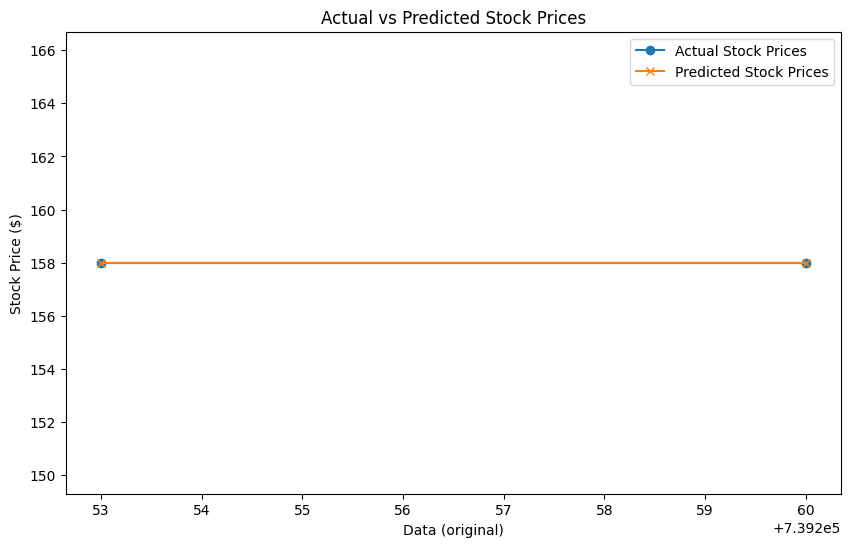

In [64]:
# Plot the diagram with Predictions.
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='Actual Stock Prices', marker='o')
plt.plot(x_test, y_test, label='Predicted Stock Prices', marker='x')
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Data (original)")
plt.ylabel("Stock Price ($)")
plt.legend()
plt.show()

In [65]:
future_date = pd.Timestamp('2025-12-12').toordinal()
future_date = pd.DataFrame({'Date': [future_date]})

In [66]:
predicted_price = model.predict(future_date)
print(f"Predicted Stock Price: ${predicted_price[0]:.2f}")

Predicted Stock Price: $437.92
